# Understanding the Attrition in HR

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Let's import required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import joblib
import warnings
warnings.filterwarnings('ignore')

# We will import the csv file for analysis now:

In [2]:
cd=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition[1].csv")
data=pd.DataFrame(data=cd)
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Above is the list of all columns of our dataset.

In [4]:
data.shape

(1470, 35)

Our dataset has 1470 rows and 35 columns

In [5]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Our dataset contains obejct and integer both type of data.

In [6]:
pd.set_option('display.max_columns', None)
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Our dataset does not contain any null values. Let's see the same thing with the help of heatmap.

# Visualization:

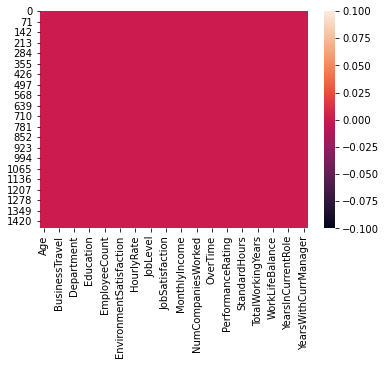

In [8]:
sns.heatmap(data.isnull())

In [9]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

EmployeeCount, Over18 and StandardHours columns has only one unique value, hence we can drop this columns

In [10]:
data.drop('EmployeeCount', axis=1, inplace=True)
#dropped Employee count column

In [11]:
data.drop('Over18', axis=1, inplace=True)
#dropped Over18 column

In [12]:
data.drop('StandardHours', axis=1, inplace=True)
#dropped StandardHours column

In [13]:
nom_col=[]
for i in data:
    if data.dtypes[i] == object:
        nom_col.append(i)
        
print(nom_col)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


Above is the list of columns which has datatype as object.

No     1233
Yes     237
Name: Attrition, dtype: int64


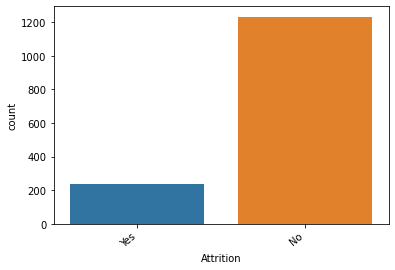

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


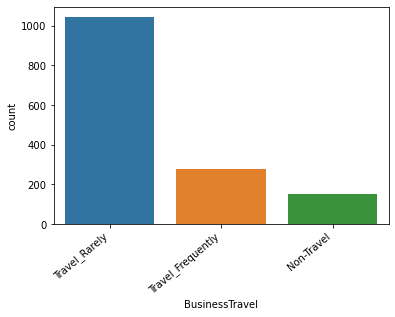

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


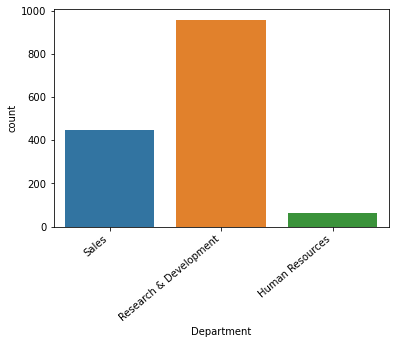

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


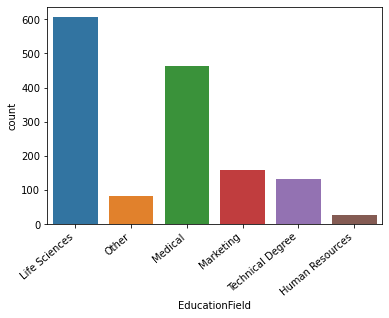

Male      882
Female    588
Name: Gender, dtype: int64


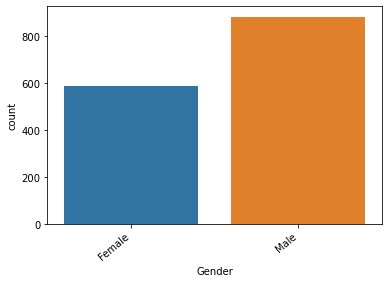

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


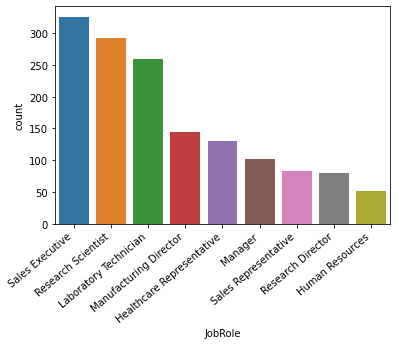

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


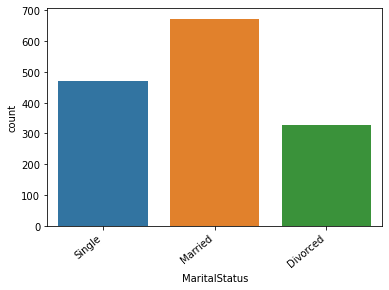

No     1054
Yes     416
Name: OverTime, dtype: int64


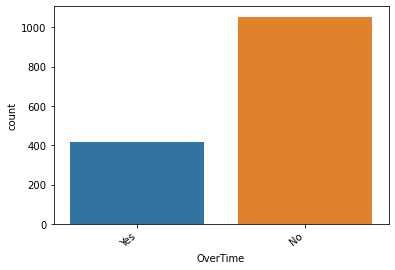

In [14]:
for i in nom_col:
    plt.figure()
    a=sns.countplot(data[i])
    print(data[i].value_counts())
    a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
    plt.show()

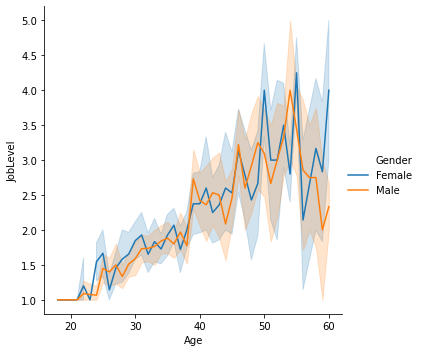

In [15]:
sns.relplot(x='Age',y='JobLevel',hue='Gender',data=data,kind='line')

We can see positive relation between JobLevel and Age, for Gender Male its dropping after 55 age.

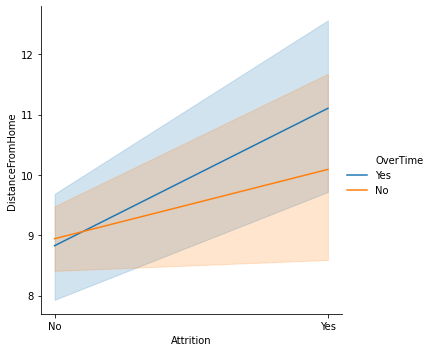

In [16]:
sns.relplot(x='Attrition',y='DistanceFromHome',hue='OverTime',data=data,kind='line')

We can see positive relation between DistanceFromHome and Attrition where employees are doing OverTime

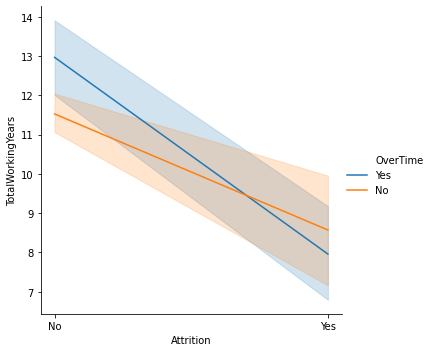

In [17]:
sns.relplot(x='Attrition',y='TotalWorkingYears',hue='OverTime',data=data,kind='line')

We can see negative relation between TotalWorkingYears and Attrition.

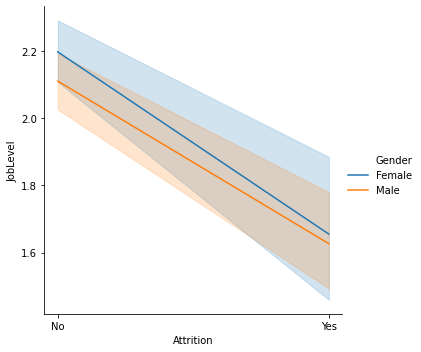

In [18]:
sns.relplot(x='Attrition',y='JobLevel',hue='Gender',data=data,kind='line')

We can see negative relation between JobLevel and Attrition for both the genders male and female

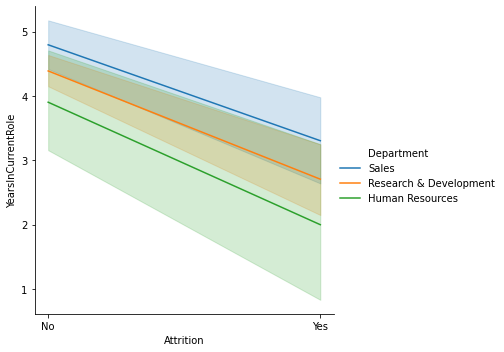

In [19]:
sns.relplot(x='Attrition',y='YearsInCurrentRole',hue='Department',data=data,kind='line')

We can see negative relation between YearsInCurrentRole and Attrition for all three departments.

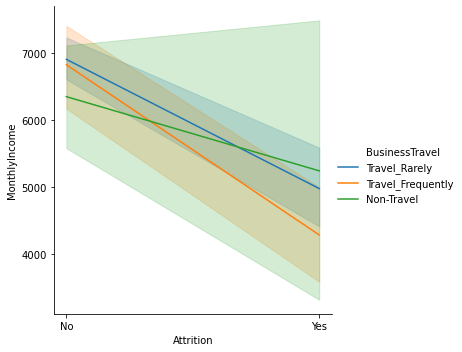

In [20]:
sns.relplot(x='Attrition',y='MonthlyIncome',hue='BusinessTravel',data=data,kind='line')

We can see negative relation high between MonthlyIncome and Attrition where employee has done BusinessTravel frequently and rarely

# Let's Check the correlation now:

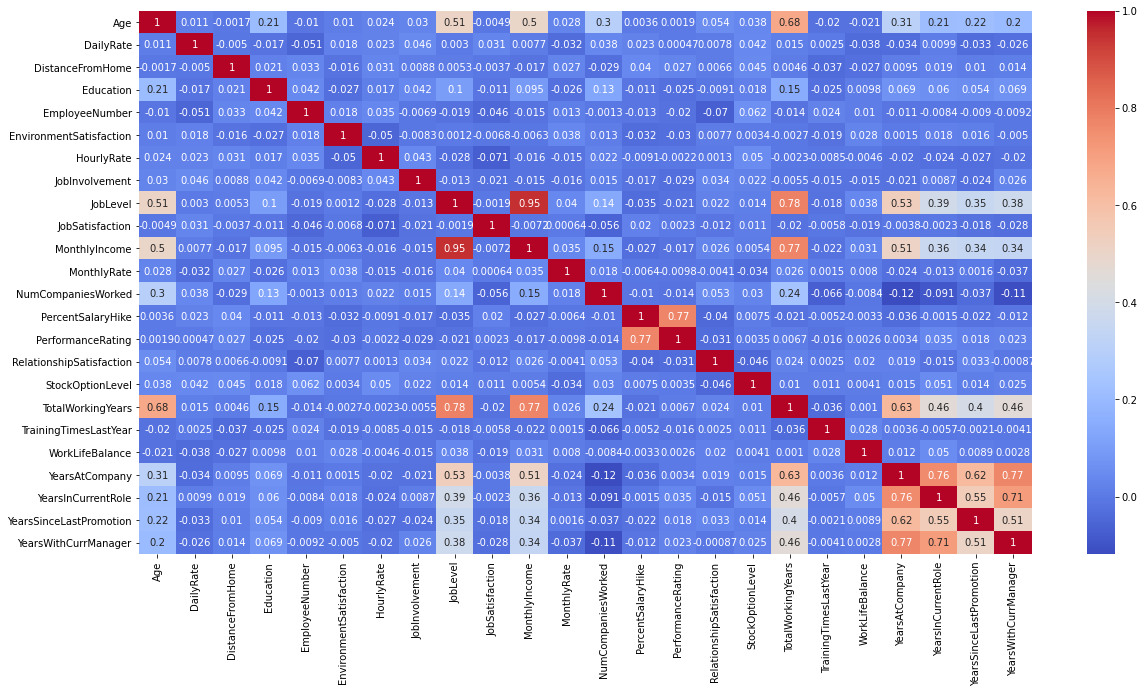

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

# Encoding:

In [22]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1))

Let's check the correlation with all columns now:

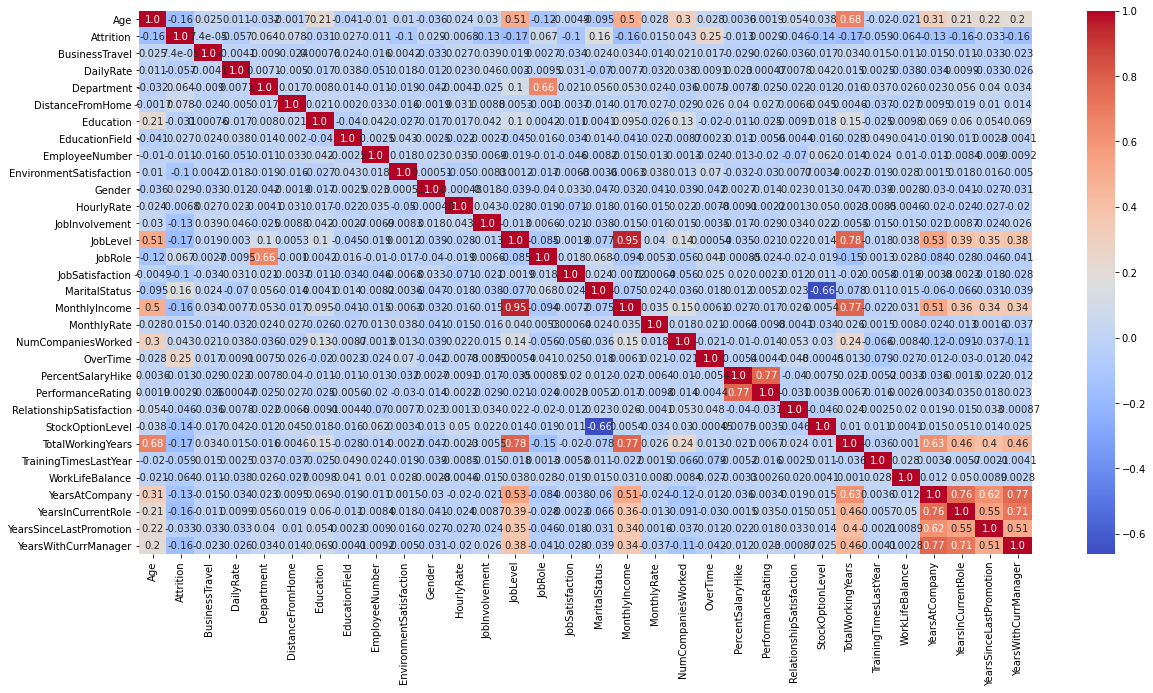

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm', fmt=".2")
plt.show()

We cannot see values clearly as we have too many columns, hence we will see correlation all columns with target column Attrition.

In [24]:
cor_matrix=data.corr()
cor_matrix['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

In [25]:
data.drop('PerformanceRating', axis=1, inplace=True)
#dropped PerformanceRating column

In [26]:
data.drop('BusinessTravel', axis=1, inplace=True)
#dropped BusinessTravel column

In [27]:
data.drop('HourlyRate', axis=1, inplace=True)
#dropped BusinessTravel column

<Figure size 1440x720 with 0 Axes>

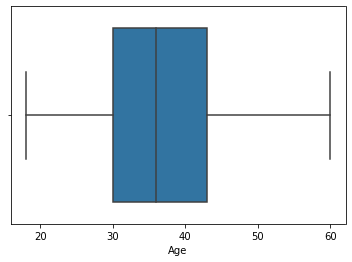

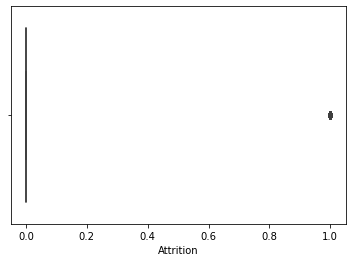

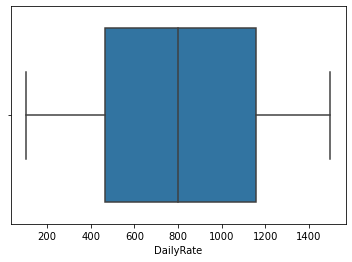

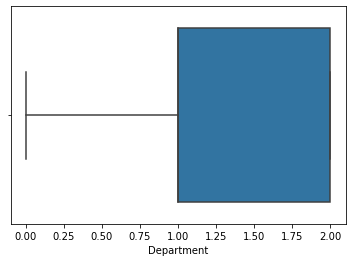

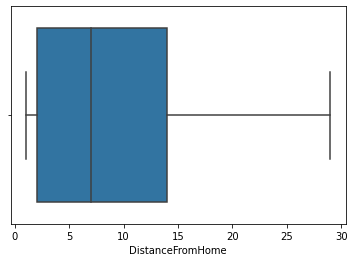

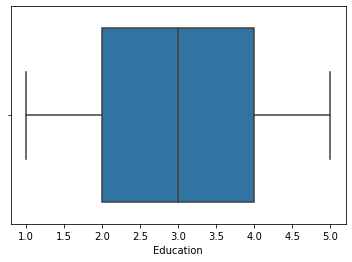

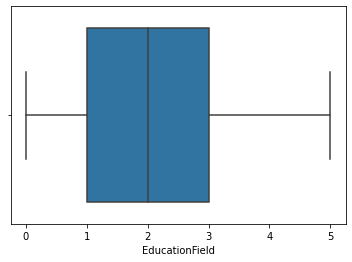

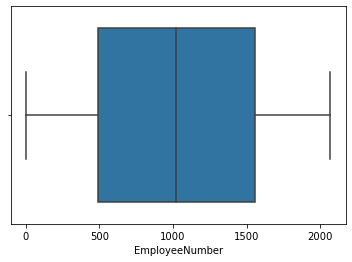

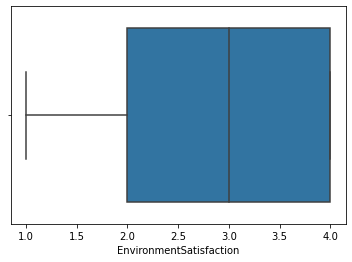

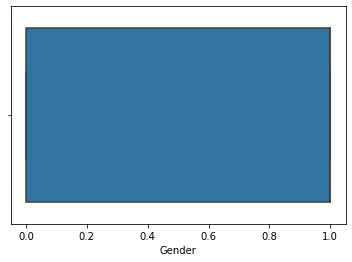

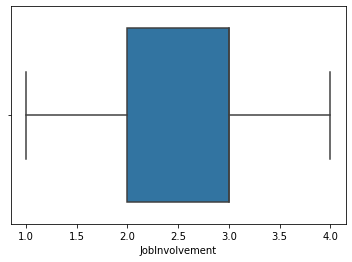

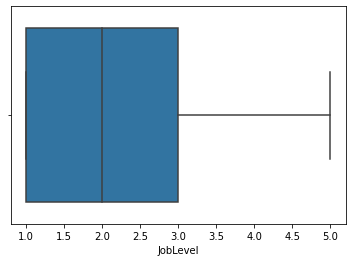

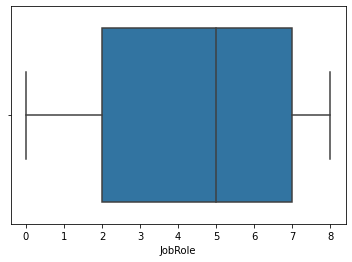

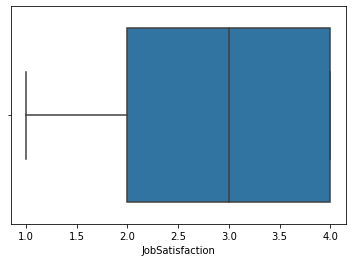

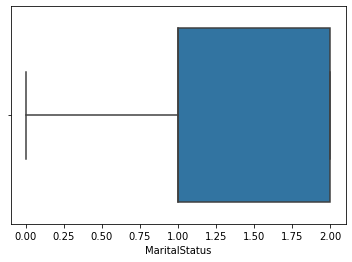

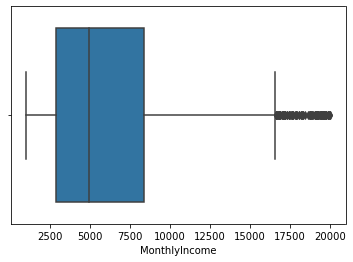

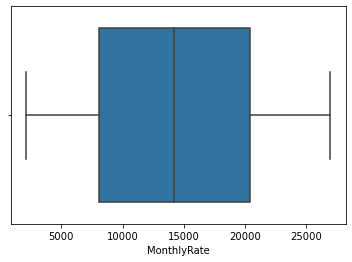

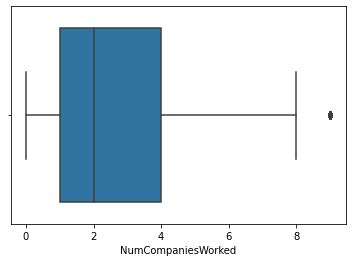

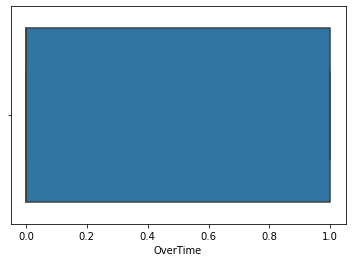

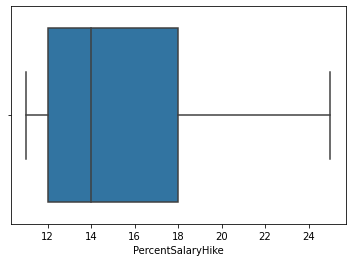

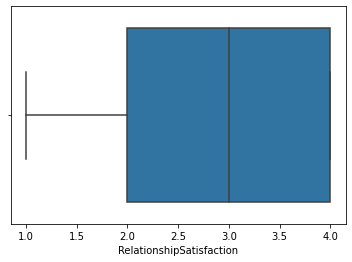

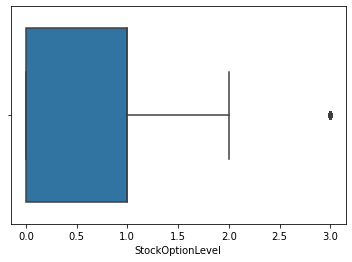

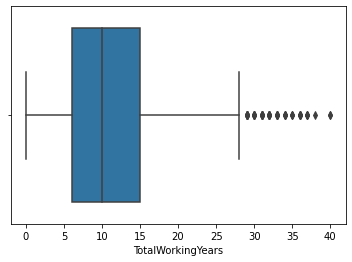

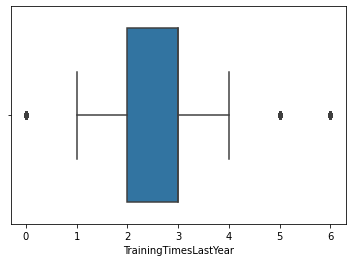

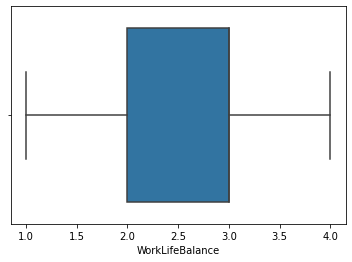

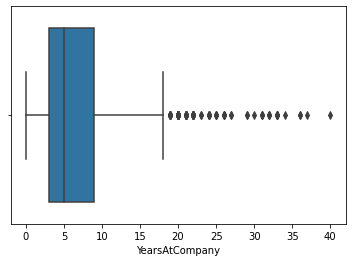

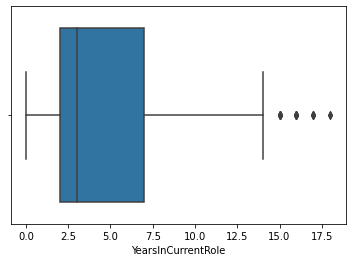

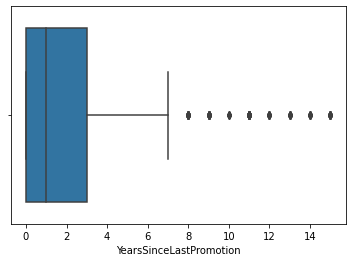

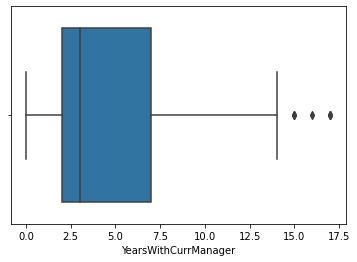

In [28]:
plt.figure(figsize=(20,10))
for i in data.columns:
    plt.figure()
    sns.boxplot(x=data[i])

We can see outliers in some columns. We will remove those.

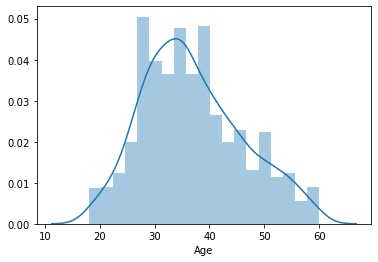

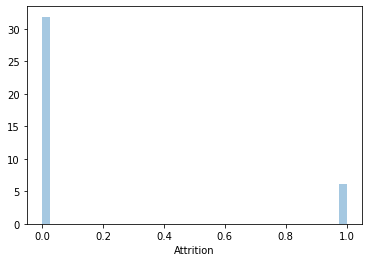

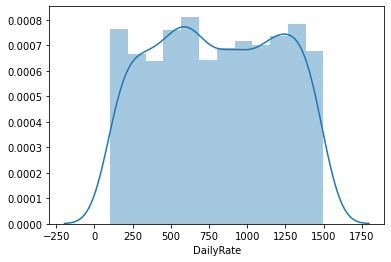

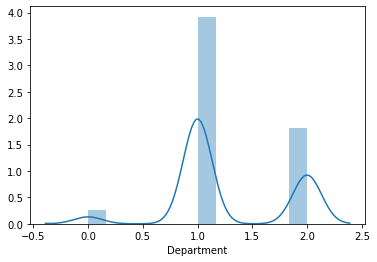

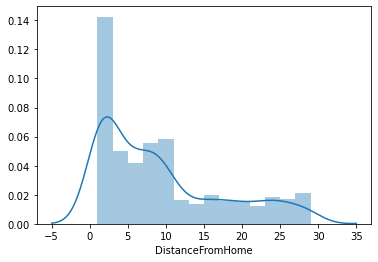

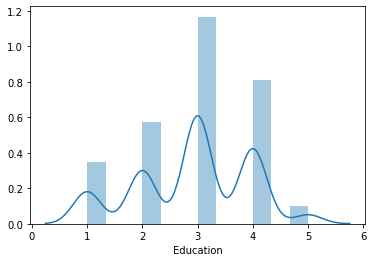

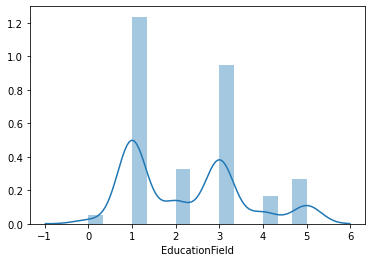

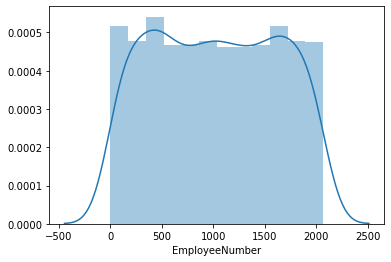

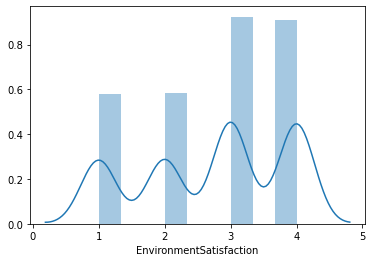

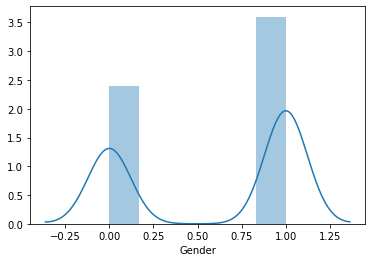

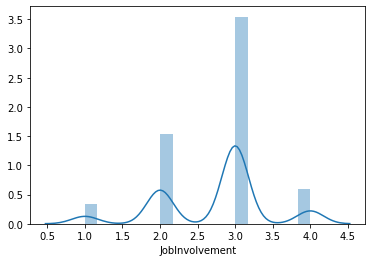

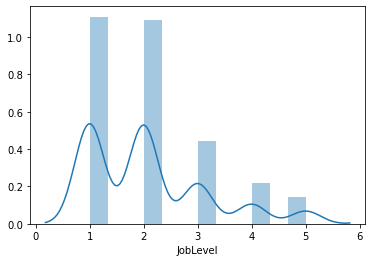

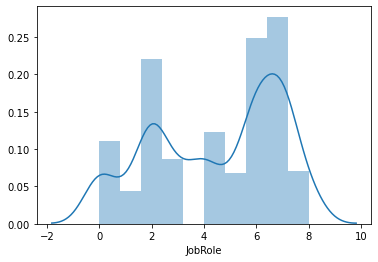

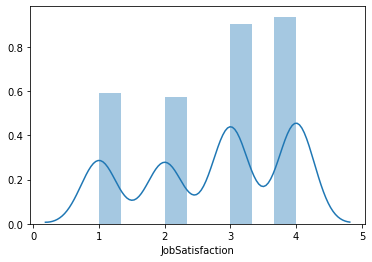

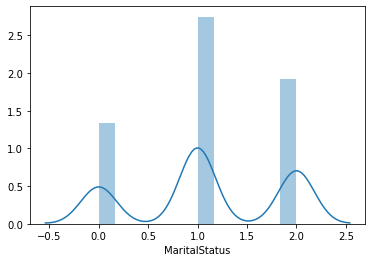

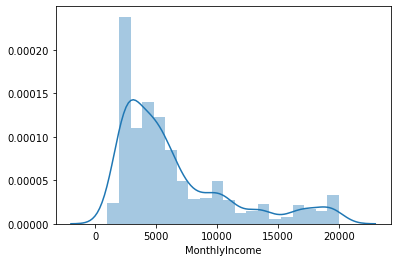

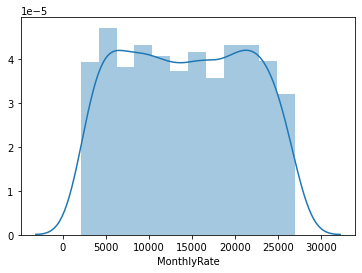

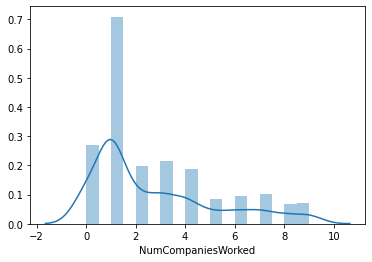

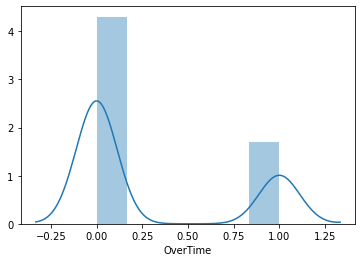

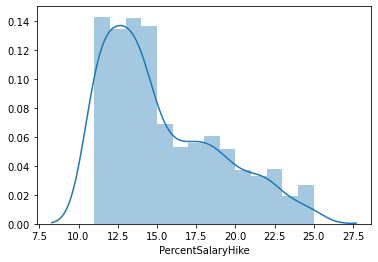

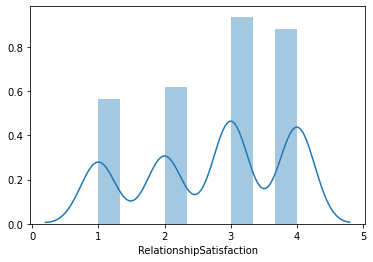

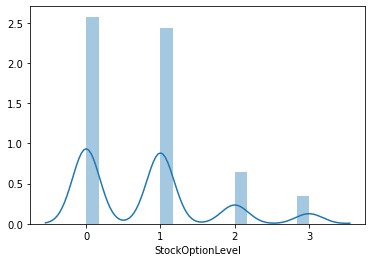

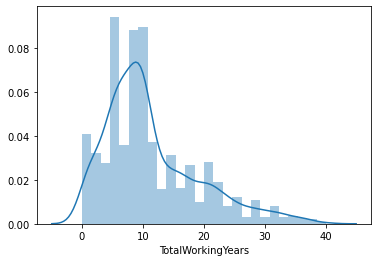

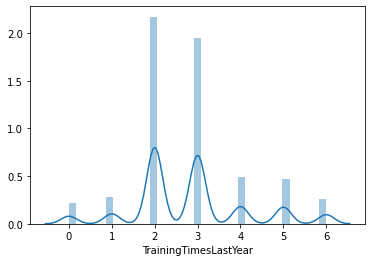

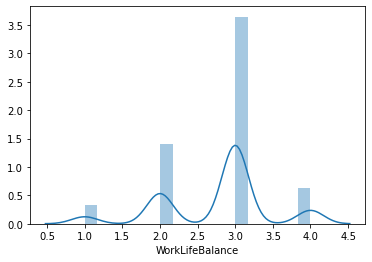

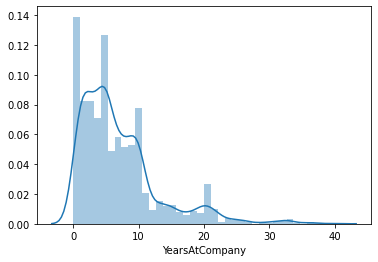

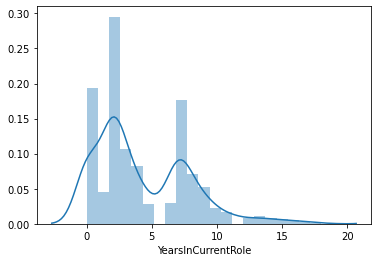

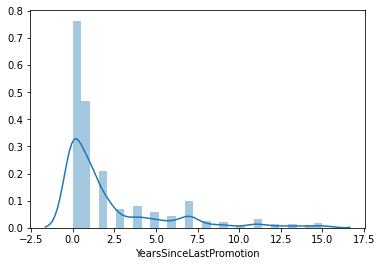

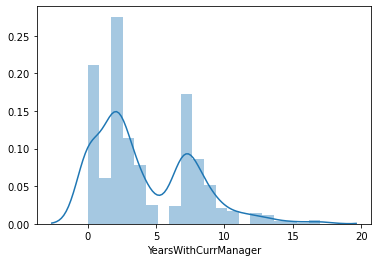

In [29]:
for i in data.columns:
    plt.figure()
    sns.distplot(data[i],kde=True)

We can see distribution is uneven in many columns

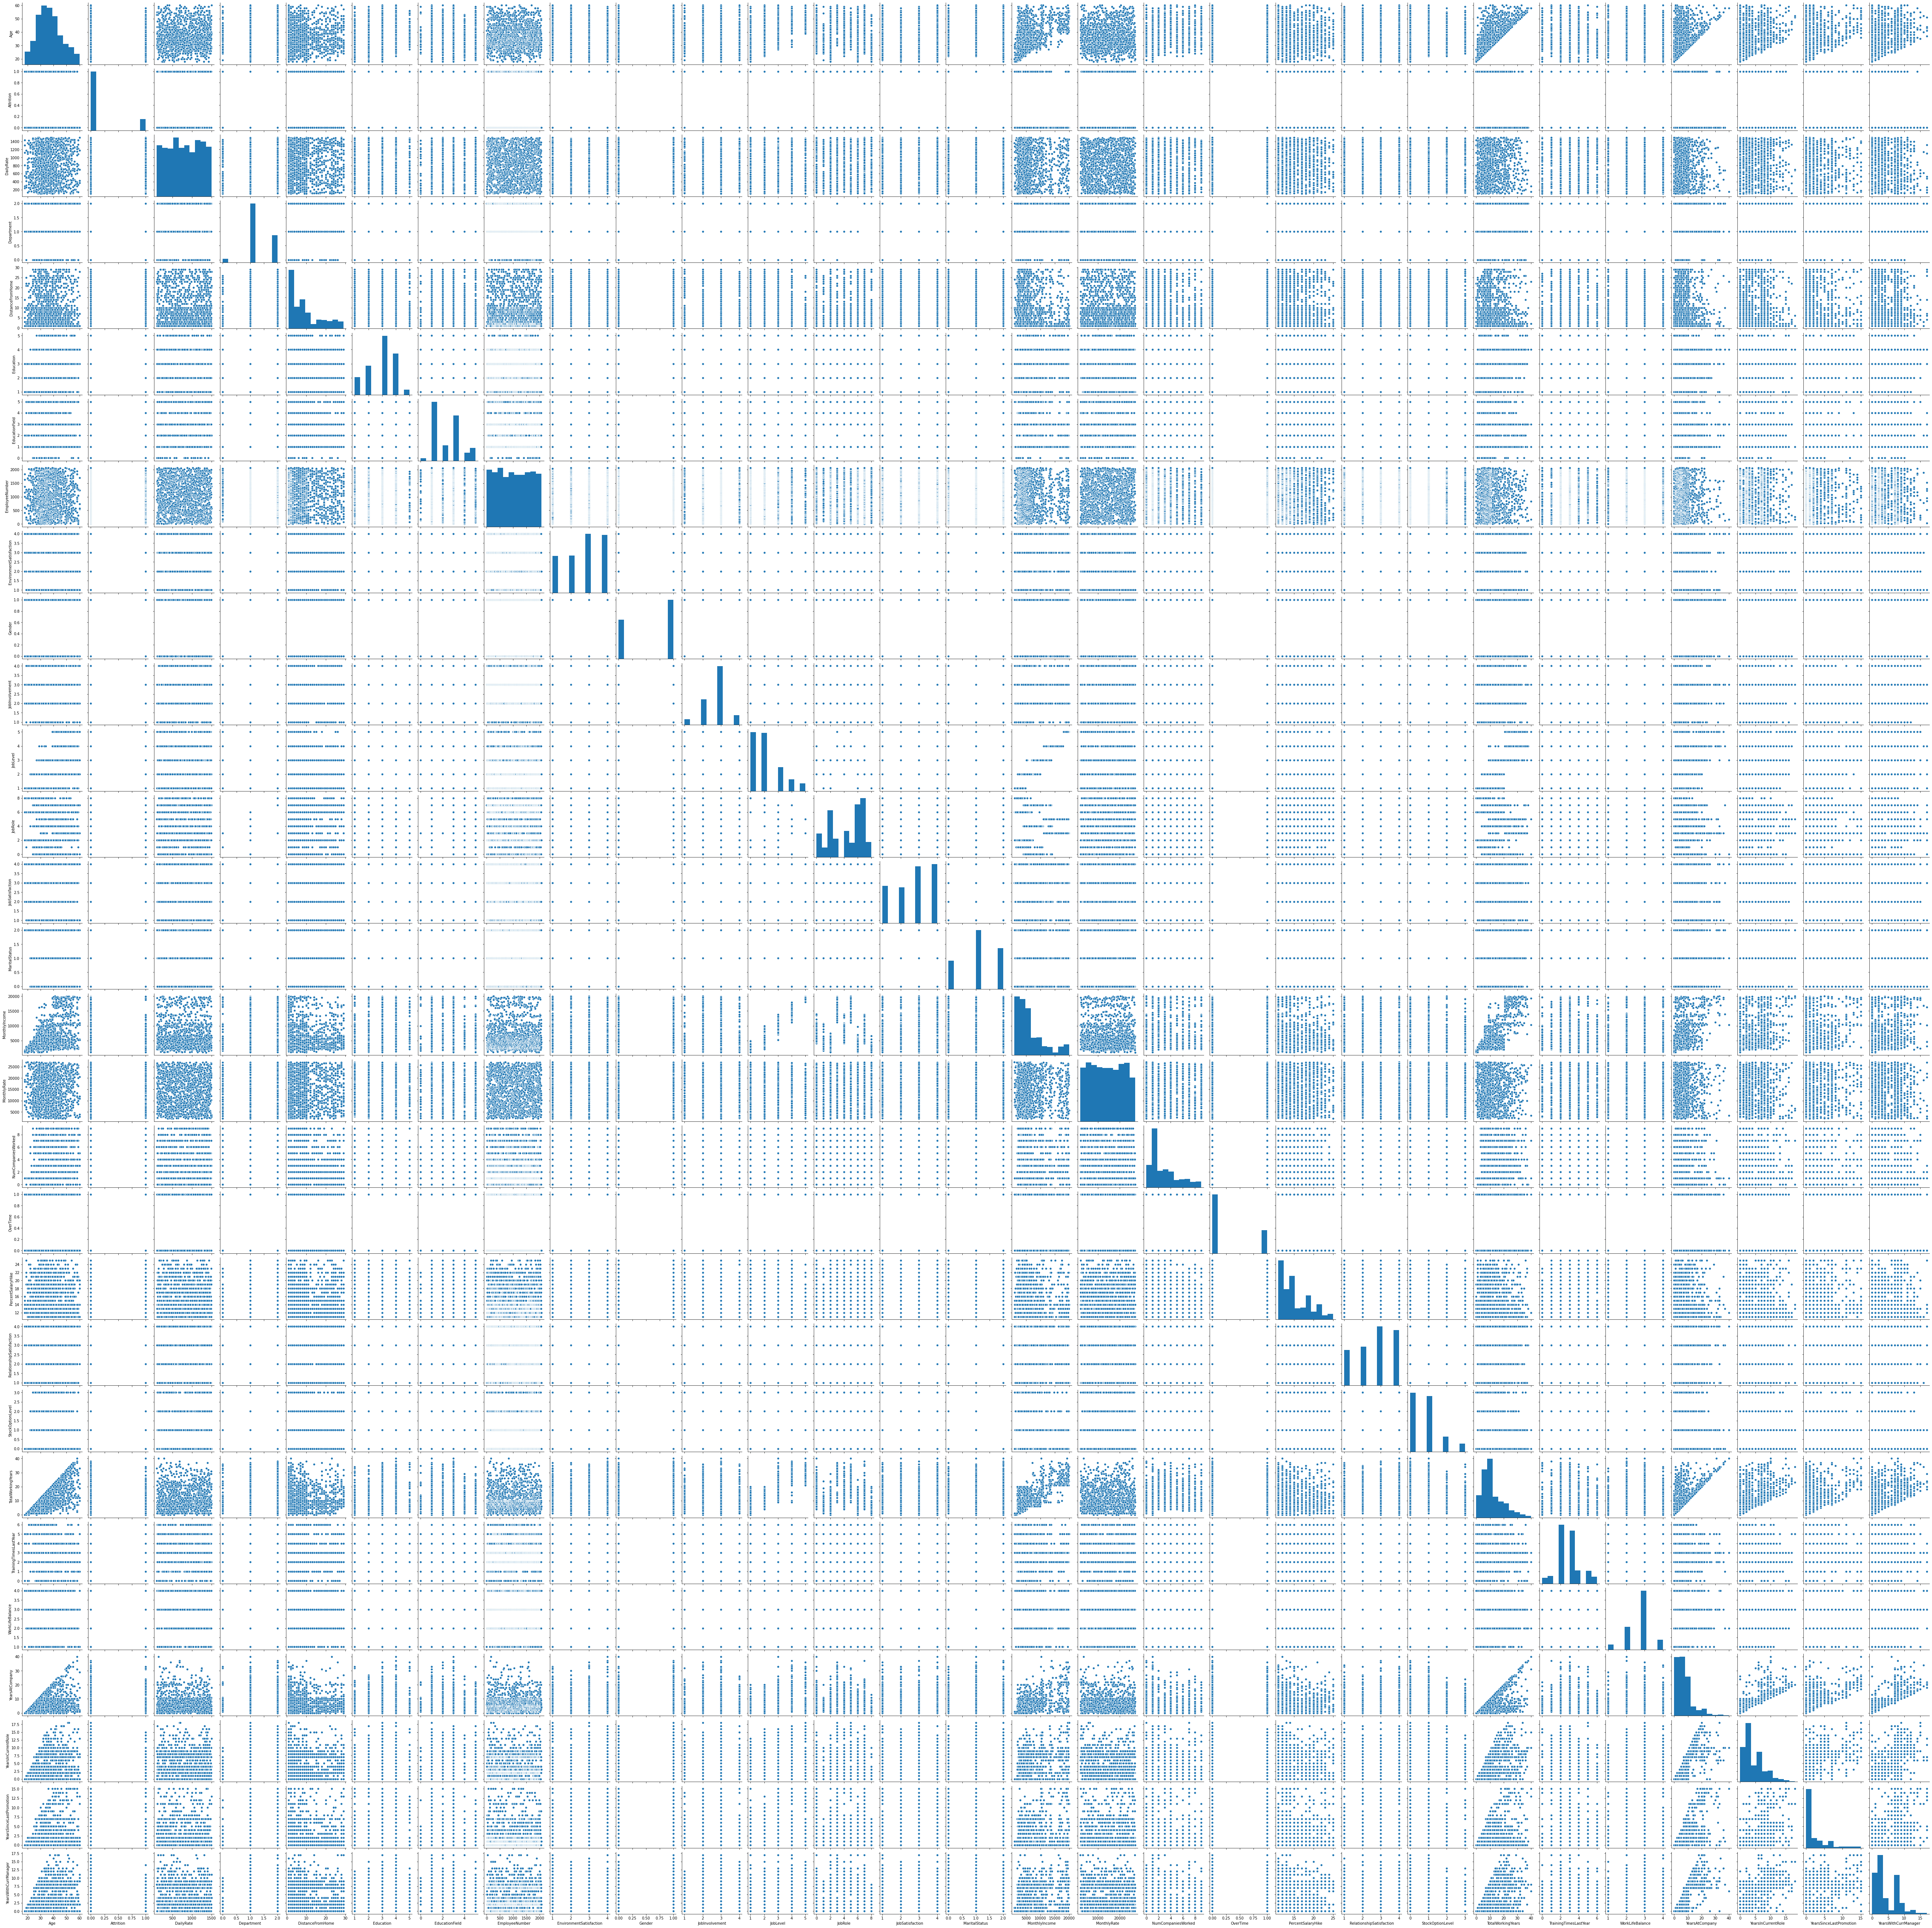

In [30]:
sns.pairplot(data)

Above pairplot shows athe relation between each and every column of our dataset.

# Skewness and outliers removal:

In [31]:
data.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
Y

In [32]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.4463504 , 2.28090588, 0.74252653, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 1.2977746 , ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 1.41436324, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 1.60518328, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.54667746, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.43256792, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [33]:
#threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([28, 27, 25, 27, 26, 27, 22, 22, 25, 27, 26, 27, 28, 22, 25, 27, 28,
       27, 22, 28, 25, 26, 27, 26, 28, 25, 27, 22, 25, 26, 27, 27, 28, 22,
       25, 25, 27, 27, 22, 26, 25, 25, 27, 25, 28, 27, 25, 22, 25, 27, 28,
       22, 28, 25, 27, 

In [34]:
data_new=data[(z<3).all(axis=1)] #removing outliers

In [35]:
data.shape

(1470, 29)

In [36]:
data_new.shape

(1387, 29)

In [37]:
#Percentage data loss:
loss_percent=(1470-1387)/1470*100
print(loss_percent)

5.646258503401361


In [38]:
x=data_new.drop('Attrition', axis=1)
y=data_new['Attrition']
print(x.shape)
print(y.shape)

(1387, 28)
(1387,)


In [39]:
from sklearn.preprocessing import power_transform
data_new=power_transform(x)

data_new=pd.DataFrame(data_new,columns=x.columns)

In [40]:
data_new.skew()

Age                        -0.004079
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EmployeeNumber             -0.287518
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
Y

We can see, now skewness has been reduced.

# Let's perform scaling now:

In [41]:
from sklearn.preprocessing import MinMaxScaler
mmc=MinMaxScaler()
mmc.fit_transform(data_new)

array([[0.65934733, 0.76144031, 1.        , ..., 0.48802844, 0.        ,
        0.58377965],
       [0.81594127, 0.17183315, 0.53093724, ..., 0.67567065, 0.43975871,
        0.70434594],
       [0.57142915, 0.92657211, 0.53093724, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.31177945, 0.0560608 , 0.53093724, ..., 0.30949453, 0.        ,
        0.42791985],
       [0.81594127, 0.71150937, 1.        , ..., 0.61990306, 0.        ,
        0.75626502],
       [0.5002426 , 0.4452798 , 0.53093724, ..., 0.40698574, 0.43975871,
        0.32653424]])

In [42]:
x=data_new

# Finding best random state

In [43]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.9136690647482014  on Random State  6


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [45]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),AdaBoostClassifier()]

for m in model:
    m.fit(x_train,y_train)
    #m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is:', acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of LogisticRegression() is: 0.9136690647482014
[[232   8]
 [ 16  22]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       240
         1.0       0.73      0.58      0.65        38

    accuracy                           0.91       278
   macro avg       0.83      0.77      0.80       278
weighted avg       0.91      0.91      0.91       278



Accuracy Score of DecisionTreeClassifier() is: 0.8129496402877698
[[208  32]
 [ 20  18]]
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       240
         1.0       0.36      0.47      0.41        38

    accuracy                           0.81       278
   macro avg       0.64      0.67      0.65       278
weighted avg       0.84      0.81      0.82       278



Accuracy Score of SVC() is: 0.8992805755395683
[[235   5]
 [ 23  15]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94

# Cross Validation of model:

In [46]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),AdaBoostClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for",m,"is: ",score.mean())

Score for LogisticRegression() is:  0.8731111861413396
Score for DecisionTreeClassifier() is:  0.7822637197101525
Score for SVC() is:  0.8687790561774408
Score for AdaBoostClassifier() is:  0.850032465002727


With SVC model there is very less difference in accuracy and cross validation score, Hence the best model is SVC.

# Hyper Parameter Tunning:

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
#AdaBoostClassifier parameters
parameters={'n_estimators': [50, 100],'learning_rate': [0.01,0.05,0.1,0.3,1],
            'algorithm':['SAMME', 'SAMME.R'], 'random_state':range(0,20)}

In [49]:
GCV=GridSearchCV(AdaBoostClassifier(), parameters,cv=5)

I am getting only [LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM] as result hence i am going ahead with second best cross validation result which is AdaboostClassifier.

In [50]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'n_estimators': [50, 100],
                         'random_state': range(0, 20)})

In [51]:
GCV.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1,
 'n_estimators': 100,
 'random_state': 0}

In [52]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [53]:
print(accuracy_score(y_test,GCV_pred))
#GCV_pred

0.9100719424460432


Accuracy has been improved to 91.071%

# Saving model

In [54]:
joblib.dump(GCV,"GCVHRAna.obj")

['GCVHRAna.obj']

In [55]:
GCVfile=joblib.load("GCVHRAna.obj")
GCVfile.predict(x_train)

array([0., 0., 1., ..., 0., 0., 0.])

Calling the saved model